In [ ]:
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [ ]:
male_data= pd.read_csv("/content/male_population.csv")
female_data= pd.read_csv("/content/female_population.csv")

In [ ]:
countries= list(male_data['Country Name'])

In [ ]:
male_data


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608,55811,56682,57475,58178,58782,...,102880,103594,104257,104874,105439,105962,106442,106585,106537,106445
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579,134169237,137835590,141630546,145605995,149742351,...,567892149,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720859132
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466,8790140,8969047,9157465,9355514,9565147,...,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290,99314028,101445032,103667517,105959979,108336203,...,387204553,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195,5441333,5521400,5599827,5673199,5736582,...,26147002,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000,966000,994000,1022000,1050000,1078000,...,1818117,1812771,1788196,1777557,1791003,1797085,1788878,1790133,1786038,1761985
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459,5646668,5753386,5860197,5973803,6097298,...,26984002,27753304,28516545,29274002,30034389,30790513,31546691,32284046,32981641,33696614
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441,16989464,17503133,18042215,18603097,19187194,...,53873616,54729551,55876504,56422274,56641209,57339635,58087055,58801927,59392255,59893885
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430,3219451,3323427,3431381,3542764,3658024,...,15234976,15737793,16248230,16767761,17298054,17835893,18380477,18927715,19473125,20017675


 ##  *   We have our data in wide format,so for better plotting we transform the data into long format.

In [ ]:
new_male_data=male_data.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Male Population"
)
new_female_data=female_data.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Female Population"
)

In [ ]:
new_male_data['Male Population']=new_male_data['Male Population'] /1e7
new_female_data['Female Population']=new_female_data['Female Population'] /1e7

In [ ]:
new_male_data.shape

(16632, 6)

In [ ]:
male_data_countrywise= new_male_data.groupby("Country Name")
female_data_countrywise= new_female_data.groupby("Country Name")

In [ ]:
print(countries)

['Aruba', 'Africa Eastern and Southern', 'Afghanistan', 'Africa Western and Central', 'Angola', 'Albania', 'Andorra', 'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Central Europe and the Baltics', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'East Asia & Pacific', 'Euro

In [ ]:
from difflib import get_close_matches

def verify_country():
  user_country= input('Enter A country name:')
  count=0
  while user_country not in countries:
    matches= get_close_matches(user_country,countries)
    if matches:
      print(f"No country found named {user_country}\nDid you mean: {matches}?")
    else:
      print('Country not found')
    count+=1
    if count==10:
      break
    user_country= input('Enter A country name:')
  return user_country

In [ ]:
def plotty(user_country):
  male_country_population= male_data_countrywise.get_group(user_country)
  female_country_population= female_data_countrywise.get_group(user_country)

  figure(figsize=(15, 8), dpi=70)
  plt.bar('Year', 'Male Population', data=male_country_population, color='blue', alpha=0.5, label='Male')
  plt.bar('Year', 'Female Population', data=female_country_population,color='red', alpha=0.5, label='Female')
  plt.legend(prop={'size':15})
  plt.xticks(rotation=60)
  plt.xlabel('Year')
  plt.ylabel('Population (in Crores)')
  plt.title(f'Population of {user_country}')
  plt.grid(which='major')
  plt.show()

## Enter the **Country** name you want to check **Population** of.

Enter A country name:India


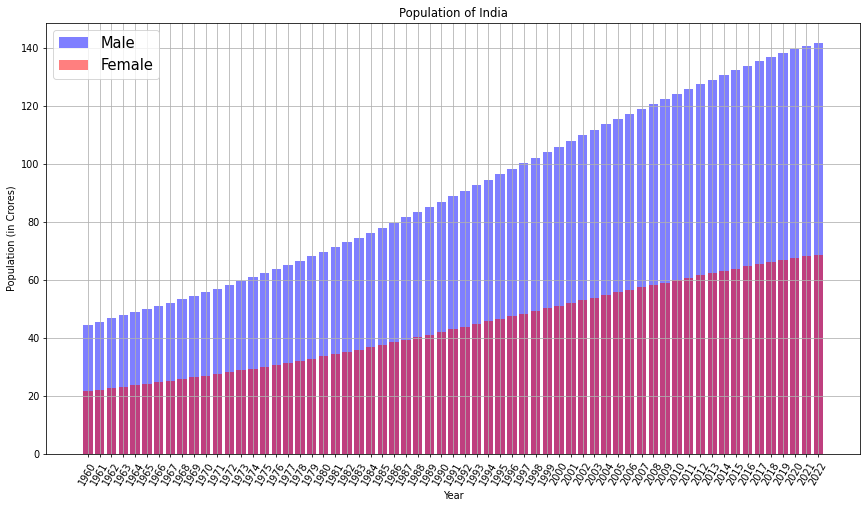

In [ ]:
user_country = verify_country()
plotty(user_country)

Do you want to compare it with another country??yes
Enter A country name:canada
No country found named canada
Did you mean: ['Canada', 'Uganda', 'Rwanda']?
Enter A country name:Canada


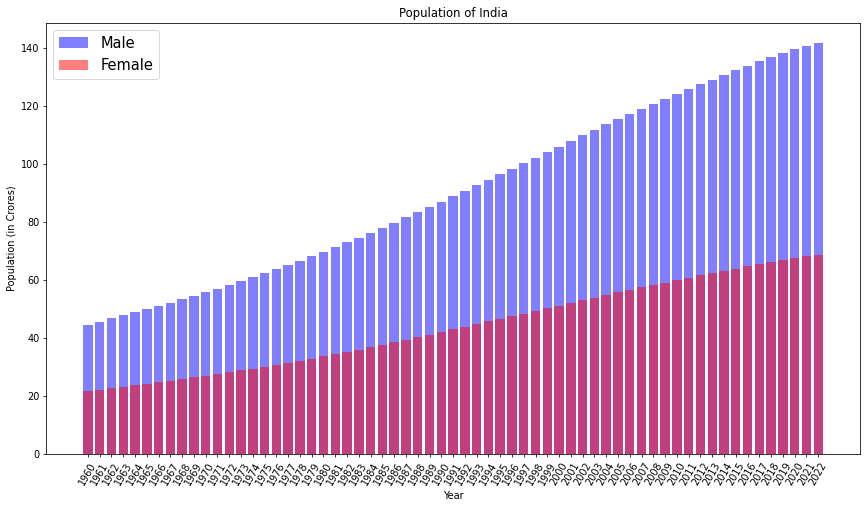

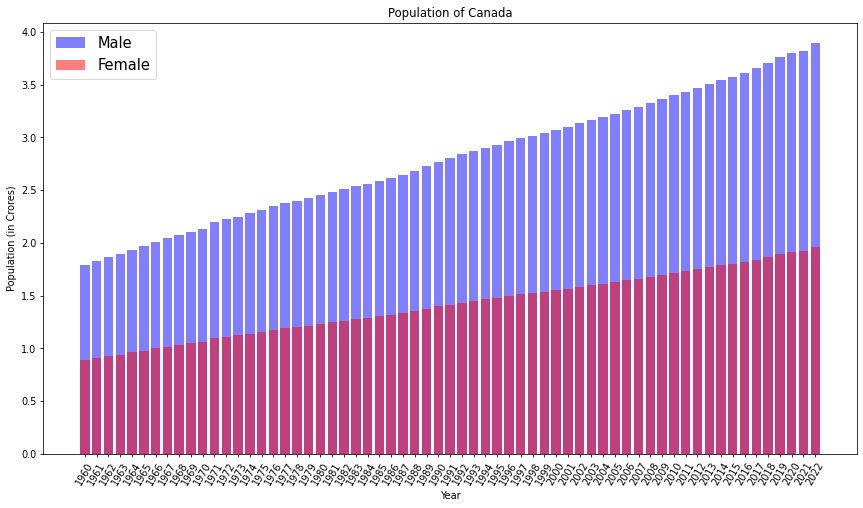

In [ ]:
ask= input('Do you want to compare it with another country??')
if ask=='Yes' or ask=='yes':
  user_country2 = verify_country()
  plotty(user_country)
  plotty(user_country2)